## Cleaning Data -- Remove Bad Scrapes TR

In [82]:
from matplotlib.pyplot import figure
import pandas
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbn

#!ls ./pickles/*
file = './pickles/20181007_183404_clarify.pkl'

clean_data = pandas.read_pickle(file)

In [91]:
import matplotlib.style as style

%matplotlib inline
# set some nicer defaults for matplotlib
from matplotlib import rcParams

#these colors come from colorbrewer2.org. Each is an RGB triplet
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (16, 10)
rcParams['figure.dpi'] = 150
#rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = True
rcParams['grid.color'] = '#eeeeee'
#rcParams['grid.color'] = 'white'
#rcParams['axes.facecolor'] = '#eeeeee'
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 16
rcParams['patch.edgecolor'] = 'none'

## UGGGGGHHHHHHH!!!!!!! LET'S REMOVE BAD ROWS (DUPLICATES FROM SCRAPING)
I just discovered that the world bank data, scraped from 
http://databank.worldbank.org/data/views/reports/reportwidget.aspx?Report_Name=CountryProfile&Id=b450fd57&tbar=y&dd=y&inf=n&zm=n&country=ABC
where ABC is a three letter country code (USA, CHN, JPN, ARM, MEX etc.)
However, for many of the lesser known countries, the website returns default information (for world, without any warning or change to the website). Obviously that data is not correct for the country. Rather it is generic WORLD data (whole world data combine?). These can be found because they all have the same values. The countries affected are:

{'SPM', 'PCN', 'TWN', 'ATF', 'CCK', 'MTQ', 'VAT', 'WLF', 'IOT', 'BLM', 'UMI', 'AIA', 'GGY', 'SGS', 'COK', 'CXR', 'BES', 'REU', 'ESH', 'ANT', 'NFK', 'MSR', 'GLP', 'SJM', 'MYT', 'ATA', 'SCG', 'SHN', 'JEY', 'TKL', 'NIU', 'ALA', 'HMD', 'FLK', 'GUF', 'BVT'}

After removing I have 580 rows of data and 20 features. 

In [16]:
def to_pickle_timestamp(df, name_str):
    """
    Saves df to ./pickle directory, with name built from name_str and a the current timestamp as follows:
    ./pickles/clean_05_20181010_123909.pkl
    """
    import time
    timestr = time.strftime("%Y%m%d_%H%M%S")
    pickle_name = "./pickles/" + name_str + '_' + timestr + ".pkl"    
    df.to_pickle(pickle_name)
    print(f'saved pickle: {pickle_name}')

In [17]:
def remove_bad_scrapes(df):
    #hardcoding the GDP values for to find inaccurate data rows due to bad website design at world bank
    mask = (df['GDP']==80683.79) | (df['GDP']==65956.67) | (df['GDP']==33571.15) | (df['GDP']== 22573.78)
    no_more_duplicates = df[~mask]
    return no_more_duplicates

clean_05 = remove_bad_scrapes(clean_data)
to_pickle_timestamp(clean_05, 'clean_05')

saved pickle: ./pickles/clean_05_20181010_124138.pkl


## ADD SUB_REGIONS TO THE DATA FRAME
each country belongs to a subregion and can be useful for one_hot_vectorization

In [34]:
clean_06 = pandas.read_pickle("./pickles/clean_05_20181010_124138.pkl")

continents = pandas.read_pickle("./countries_three_continent.pkl")
continents['CNT'] = continents['COUNTRY']  
continents = continents[['CNT', 'SUB_REGION']]

clean_07 = pandas.merge(clean_06, continents, how='left', on=['CNT'])

clean_07_region = clean_07[['CNT', 'SUB_REGION', 'YR', 'POP_TOT', 'POP_GRO%', 'AREA', 'URB_GRO%', 'FORR_AREA',
       'MORT_RATE', 'POP_DEN', 'GDP', 'CELL_SUB%', 'FER_RATE', 'CO2_PERCAP',
       'GDP_GROW%', 'INF%', 'INTERNET%', 'FOR_INV_NET', 'IMM_MEAS', 'GNI_ATL',
       'GPC_ATL', 'LIF_EXP', 'TEEN_FER_RATE', 'NET_MIG' ]]

to_pickle_timestamp(clean_07_region, 'clean_07_region')

saved pickle: ./pickles/clean_07_region_20181010_125441.pkl


In [35]:
clean_07_region.head()

,CNT,SUB_REGION,YR,POP_TOT,POP_GRO%,AREA,URB_GRO%,FORR_AREA,MORT_RATE,POP_DEN,...,GDP_GROW%,INF%,INTERNET%,FOR_INV_NET,IMM_MEAS,GNI_ATL,GPC_ATL,LIF_EXP,TEEN_FER_RATE,NET_MIG
0,ARM,Western Asia,2017.0,2.93,0.2,29.7,0.2,3.3,13.0,102.9,...,7.5,2.2,64.3,246.0,96.0,11.71,4000.0,75.0,24.0,-25.0
1,EGY,Northern Africa,2017.0,97.55,1.9,1001.5,1.9,0.7,22.0,98.0,...,4.2,22.9,45.0,7392.0,94.0,293.38,3010.0,71.0,51.0,-275.0
2,KAZ,Central Asia,2017.0,18.04,1.4,2724.9,1.5,33.1,10.0,6.7,...,4.0,6.4,76.4,4542.0,99.0,142.27,7890.0,72.0,28.0,0.0
3,MEX,Latin America and the Caribbean,2017.0,129.16,1.3,1964.4,1.6,660.4,13.0,66.4,...,2.0,6.1,63.9,31726.0,96.0,1112.53,8610.0,77.0,61.0,-300.0
4,ZAF,Sub-Saharan Africa,2017.0,56.72,1.2,1219.1,2.0,92.4,37.0,46.8,...,1.3,5.5,54.0,1372.0,60.0,308.19,5430.0,63.0,44.0,300.0


## Add One-hot Vector for Subregion

In [40]:
dummies = pandas.get_dummies(clean_07_region['SUB_REGION'], dtype=float)
clean_08_dummies = clean_07_region.join(dummies)
clean_08_dummies.shape #[clean_08_dummies['MORT_RATE'] > 100 ]

(581, 41)

In [41]:
to_pickle_timestamp(clean_08_dummies, 'clean_08_dummies')

saved pickle: ./pickles/clean_08_dummies_20181010_130441.pkl


In [58]:
mask = (clean_08_dummies['MORT_RATE'] < 100) & (clean_08_dummies['SUB_REGION'] == 'Sub-Saharan Africa')
#mask = (clean_08_dummies['SUB_REGION'] == 'Sub-Saharan Africa')
#mask = (clean_08_dummies['GDP'] == 'Sub-Saharan Africa')
clean_08_dummies[mask].mean()

YR                                 2009.565789
POP_TOT                              16.371053
POP_GRO%                              2.357895
AREA                                415.786842
URB_GRO%                              3.726316
FORR_AREA                           111.431579
MORT_RATE                            63.657895
POP_DEN                             117.339474
GDP                                  25.351711
CELL_SUB%                            59.110526
FER_RATE                              4.248684
CO2_PERCAP                            1.451579
GDP_GROW%                             4.869737
INF%                                  7.778947
INTERNET%                            13.453947
FOR_INV_NET                         583.605263
IMM_MEAS                             82.460526
GNI_ATL                              23.495921
GPC_ATL                            2337.368421
LIF_EXP                              61.763158
TEEN_FER_RATE                        90.802632
NET_MIG      

## Visualize BoxCox Transformations (if good we will use, but probably as log(x))

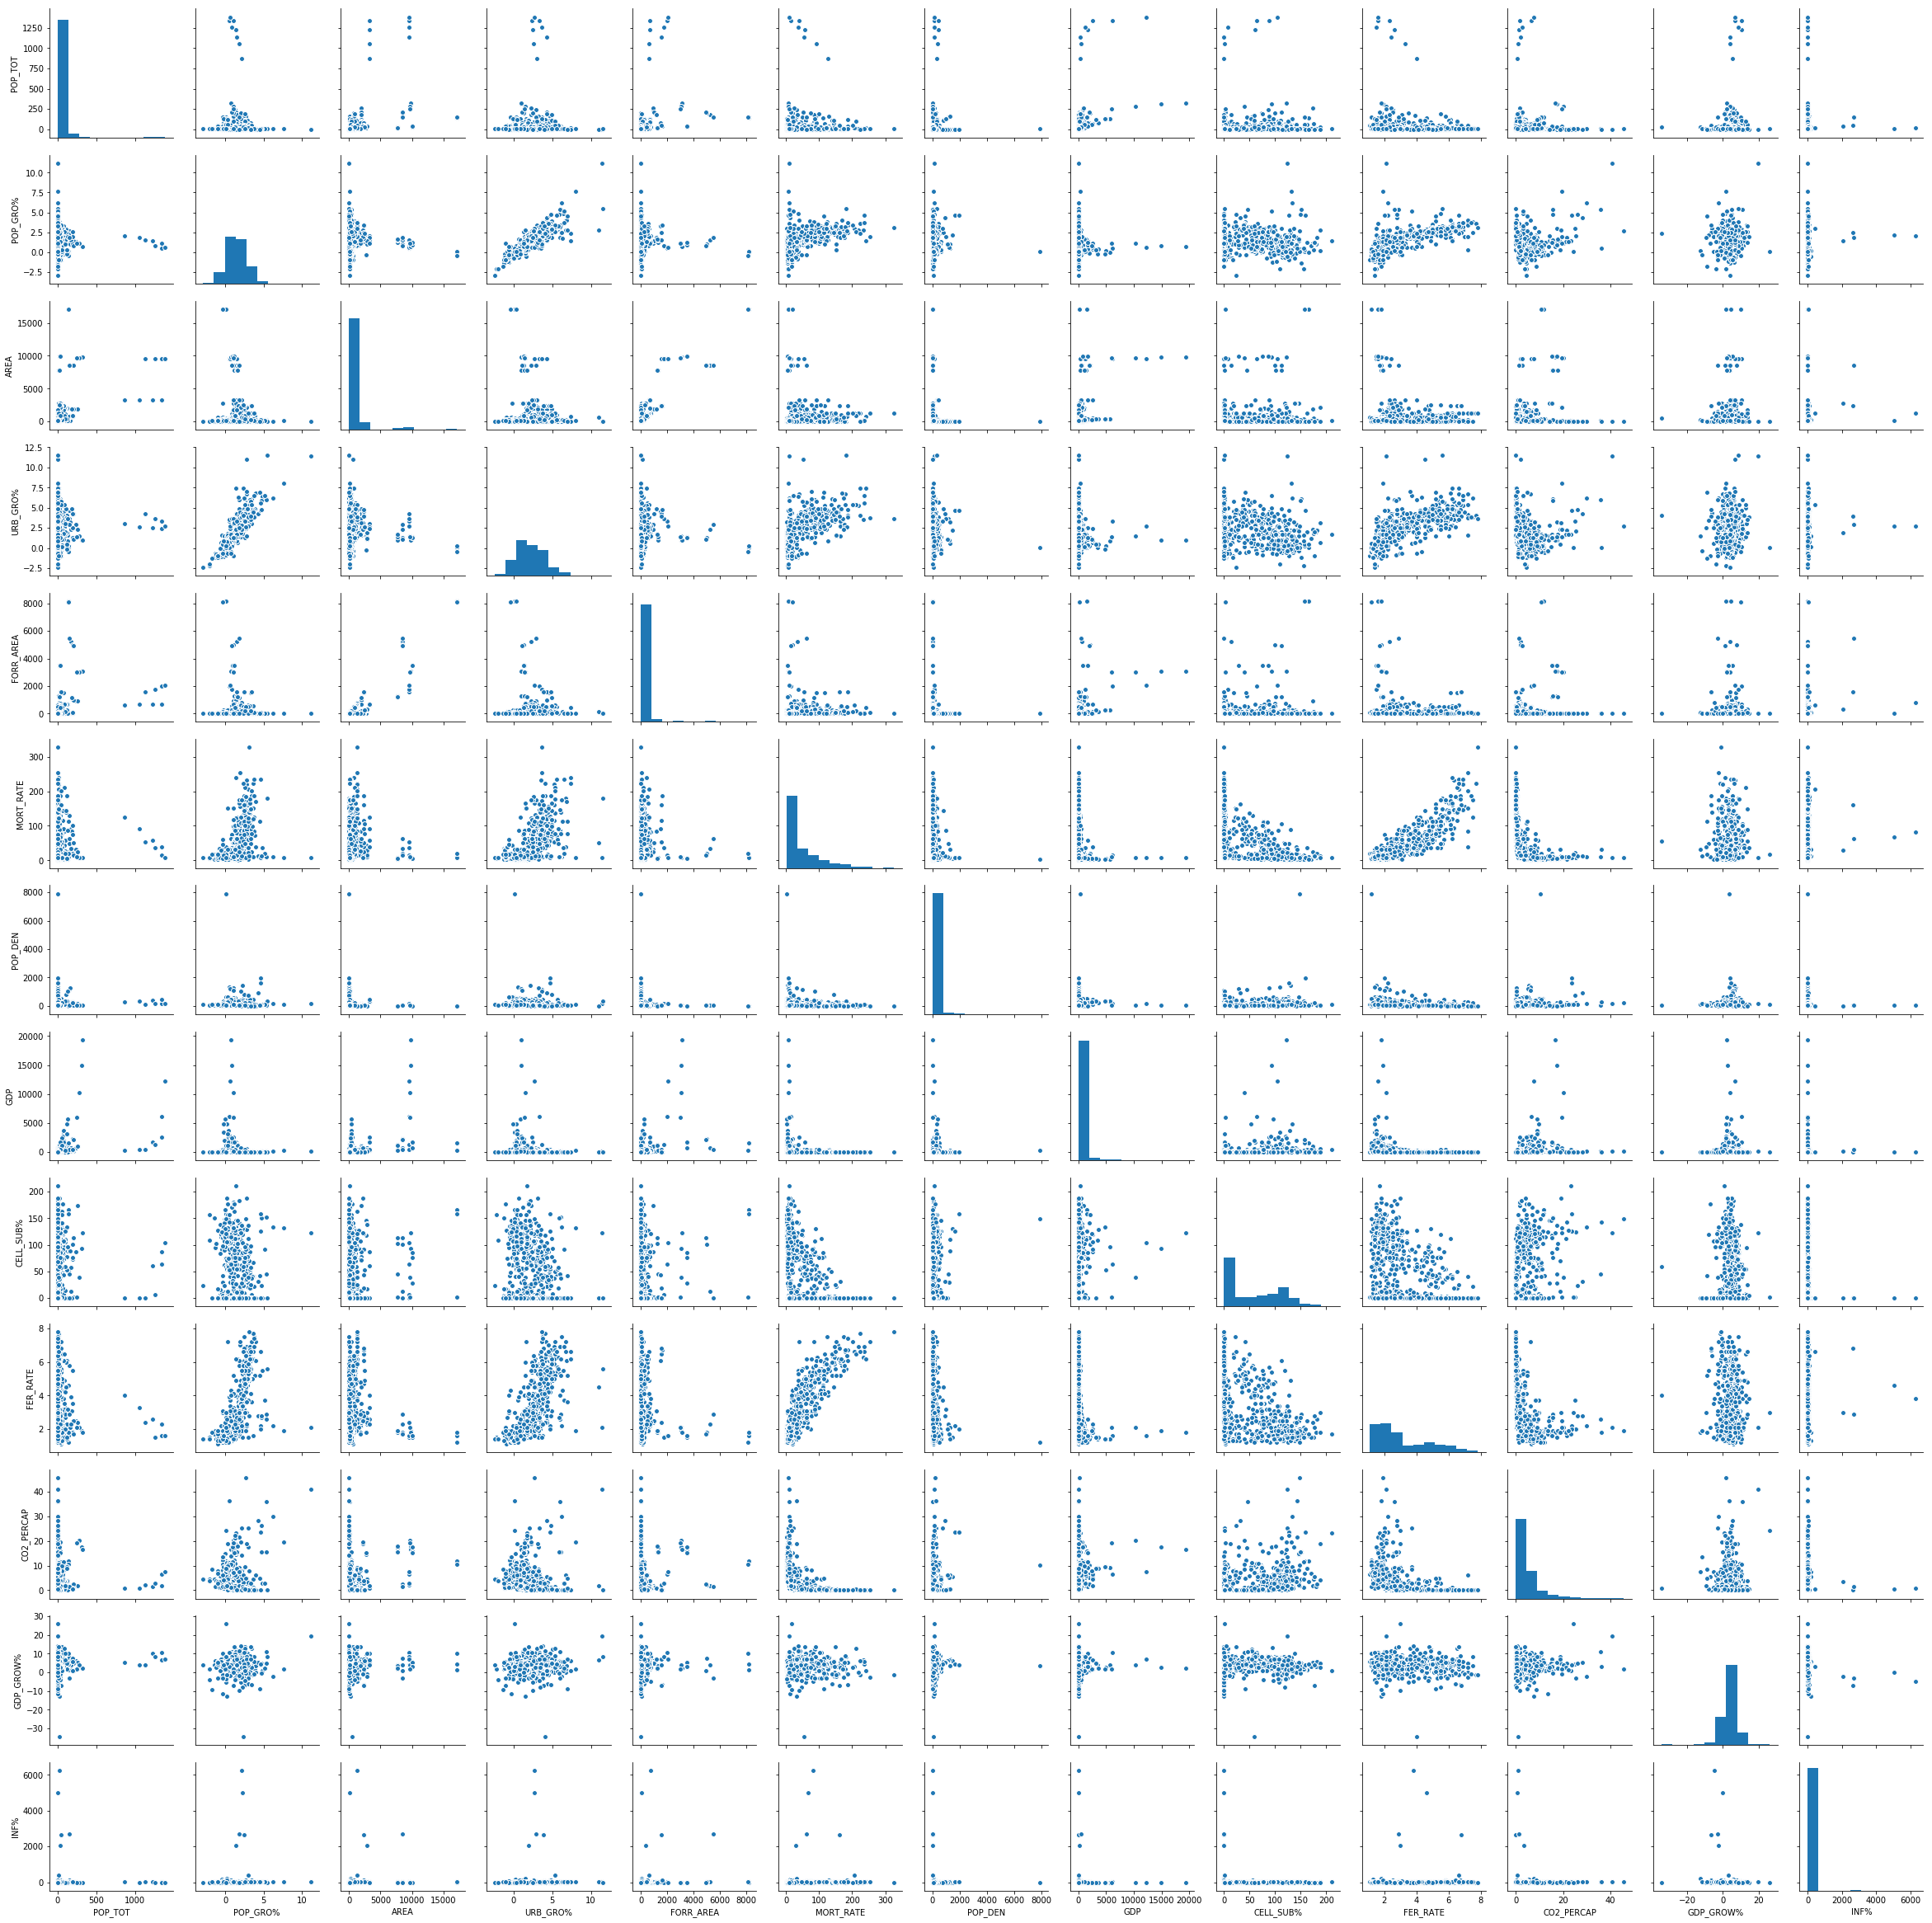

In [115]:
sbn.pairplot( clean_data_2.iloc[:,2:15] )

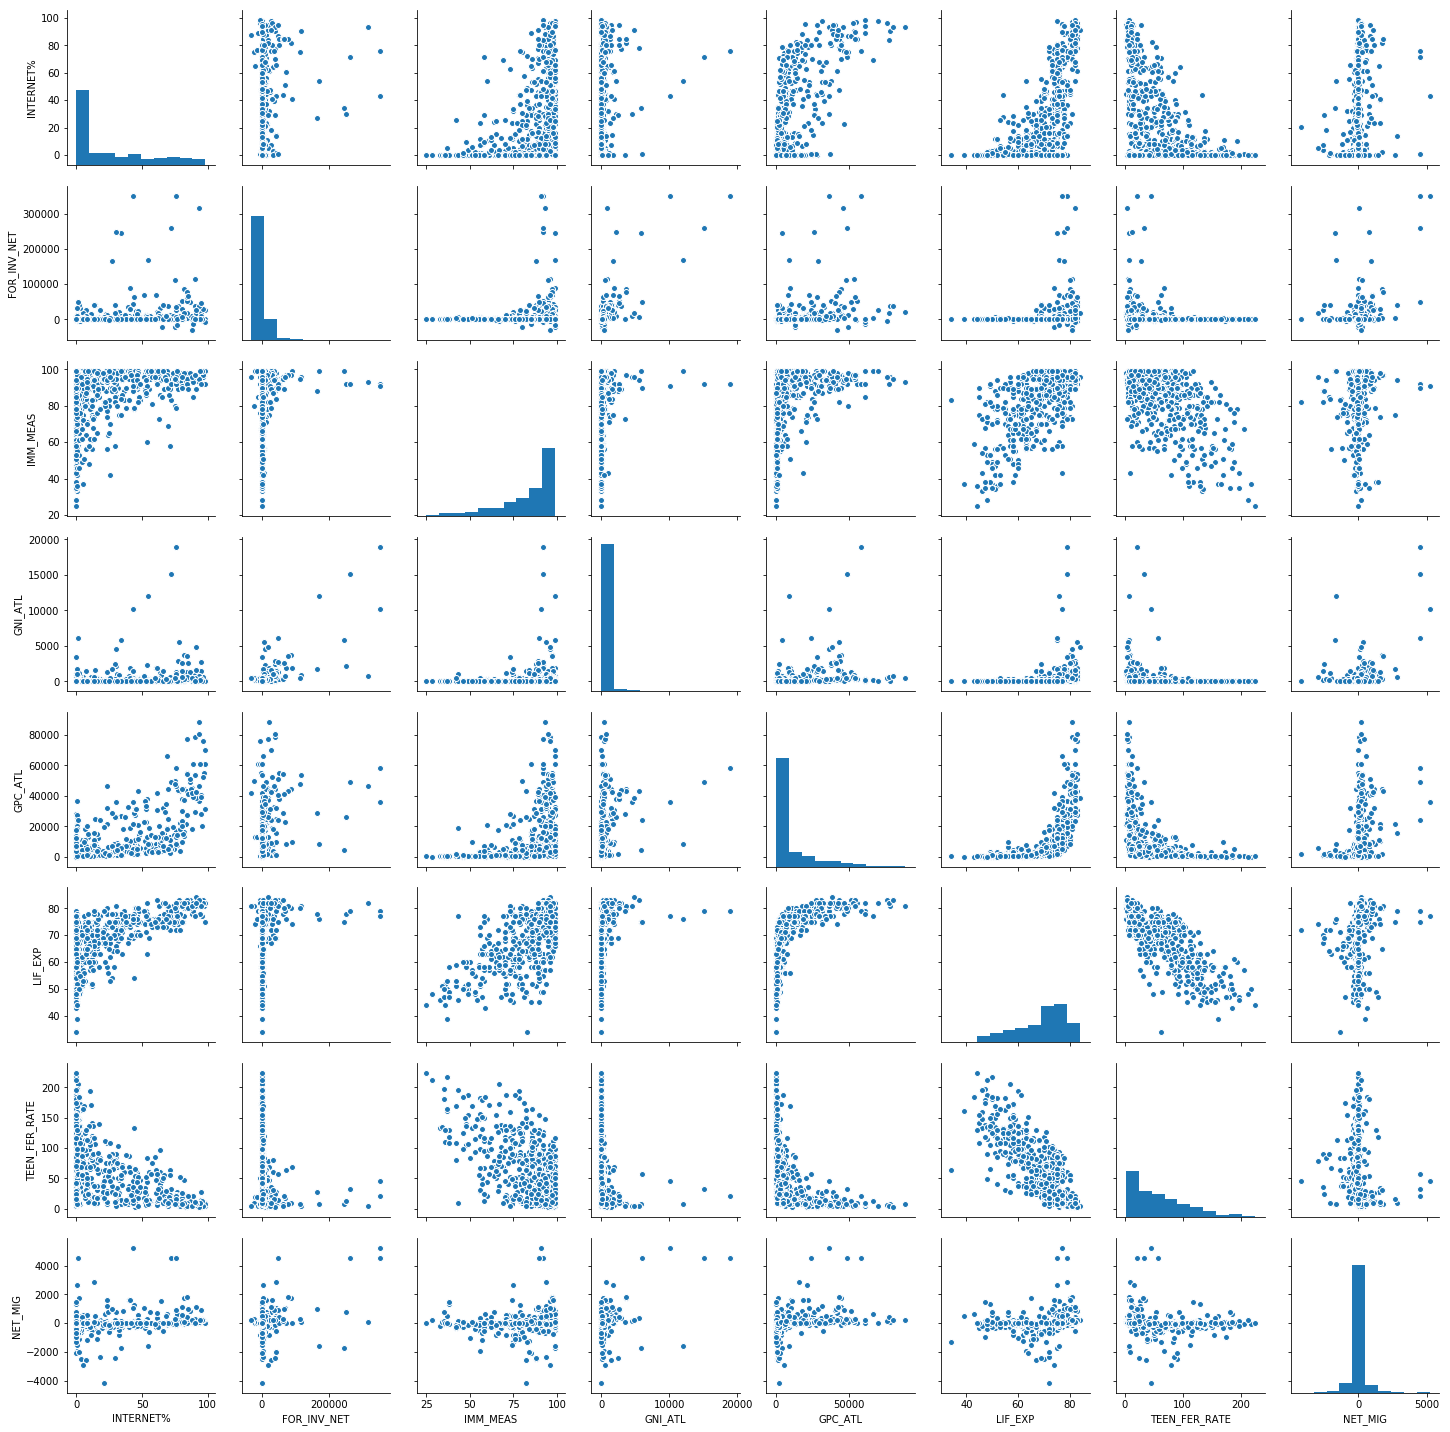

In [116]:
sbn.pairplot( clean_data_2.iloc[:,15:] )

In [181]:
clean_data_09[clean_data_09.CNT == 'CAN'][['CNT', 'YR', 'GDP', 'GPC_ATL']]

,CNT,YR,GDP,GPC_ATL
413,CAN,2010.0,1613.46,44370.0
482,CAN,2000.0,742.29,22610.0
491,CAN,2017.0,1653.04,42870.0


In [276]:
clean_data_09 = clean_08_dummies.copy()
clean_data_09['log_MORT_RATE'] = np.log(clean_data_09['MORT_RATE'])
clean_data_09['log_POP_DEN'] = np.log(clean_data_09['POP_DEN'])
clean_data_09['log_POP_TOT'] = np.log(clean_data_09['POP_TOT'])
clean_data_09['log_GDP'] = np.log(clean_data_09['GDP'])
clean_data_09['log_CO2_PERCAP'] = np.log(clean_data_09['CO2_PERCAP'])
clean_data_09['log_GPC_ATL'] = np.log(clean_data_09['GPC_ATL'])
clean_data_09['log_FORR_AREA'] = np.log(clean_data_09['FORR_AREA']+0.1)


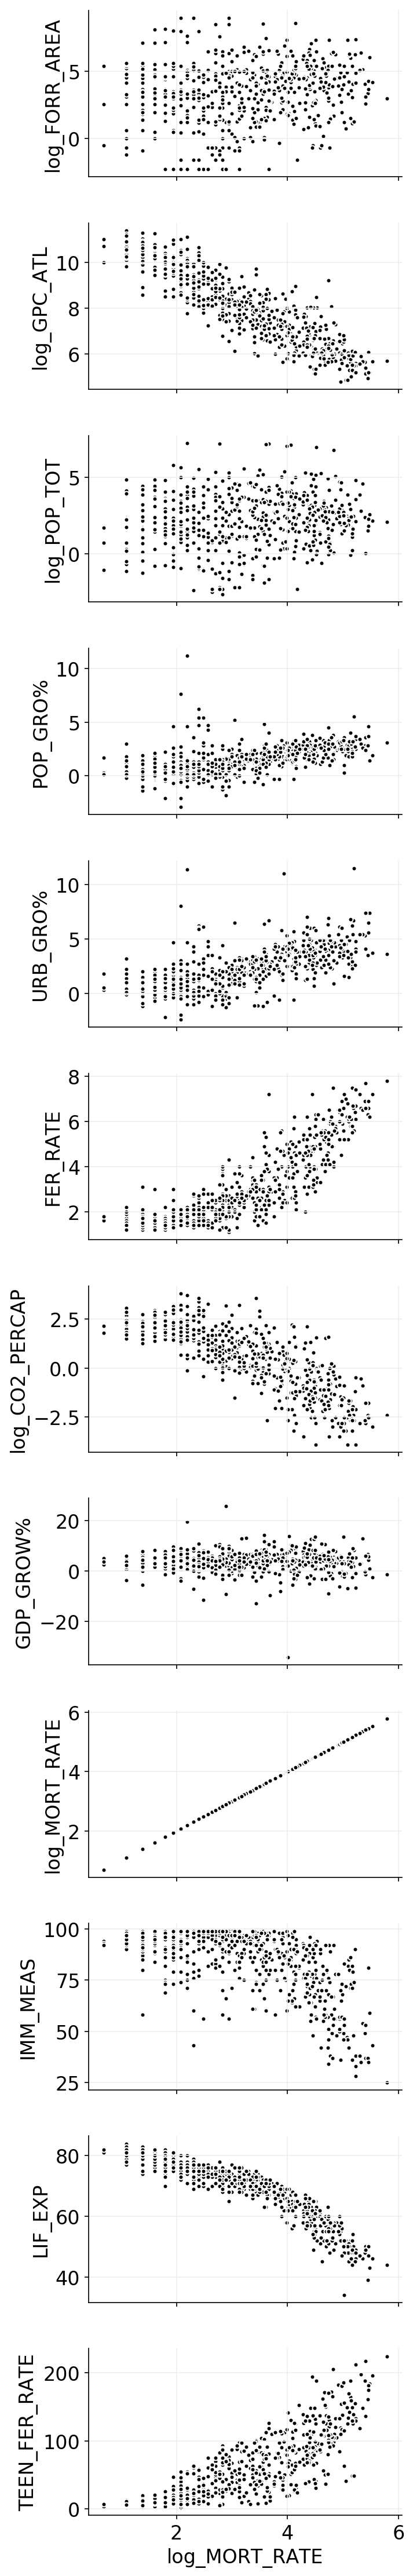

In [47]:
sbn.pairplot(data=clean_data_09, aspect=2, x_vars=['log_MORT_RATE'],
                                           y_vars=['log_FORR_AREA','log_GPC_ATL', 'log_POP_TOT', 'POP_GRO%', 
                                                   'URB_GRO%', 'FER_RATE', 'log_CO2_PERCAP','GDP_GROW%', 
                                                   'log_MORT_RATE','IMM_MEAS', 'LIF_EXP', 'TEEN_FER_RATE'], 
                                                    #hue='SUB_REGION',
                                                    plot_kws=dict(s=15, alpha=1, color='k'))



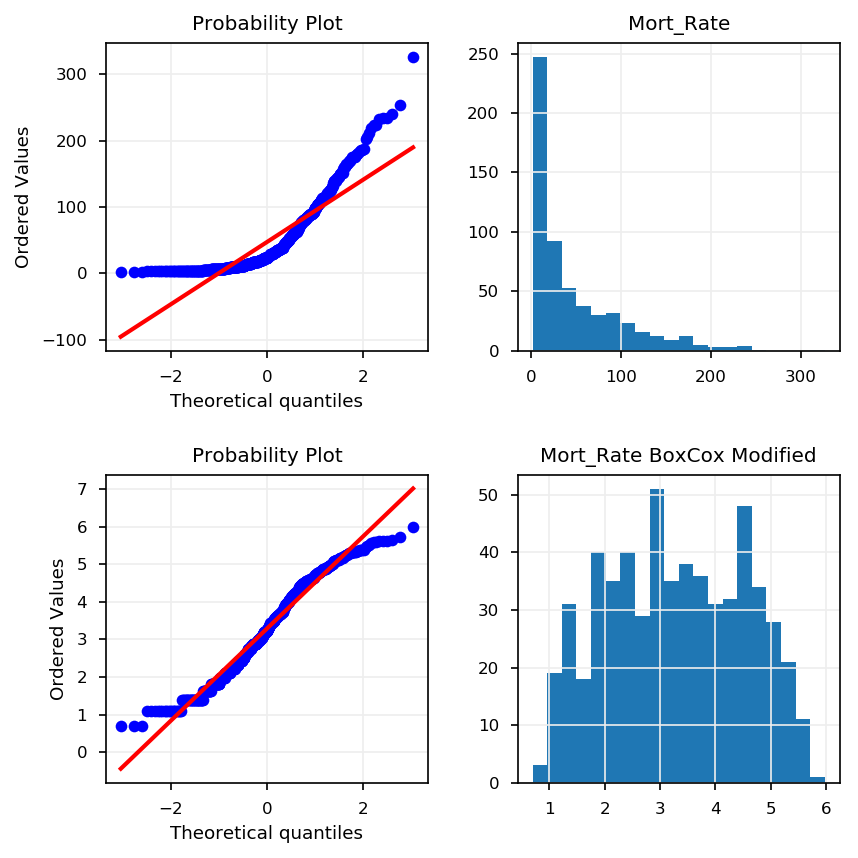

In [310]:
#####################
######   TIDY  ######
#####################

from scipy import stats
import matplotlib.pyplot as plt

#x = stats.loggamma.rvs(5, size=500) + 5
#plt.subplots(4,1)

def boxcox_vis(x, title='Default Title', bin_num=20):
    """
    prints the QQ plot and histogram before and after transformation of a pandas.Series
    """
    h,w=(6,6)
    figure(figsize=(h,w))
    xt, _ = stats.boxcox(x)
    
    i = 1
    for data_set in [x, xt]:
        #left plots
        ax1 = plt.subplot(2,2,i)
        stats.probplot(data_set, dist=stats.norm, plot=ax1)

        #right plots    
        ax2 = plt.subplot(2,2,i+1)
        ax2.set_title(title)
        ax2.hist(data_set, bins=bin_num)

        i+=2
        title= title + ' BoxCox Modified'
    plt.tight_layout()

boxcox_vis(clean_data_09['MORT_RATE'], title='Mort_Rate') 


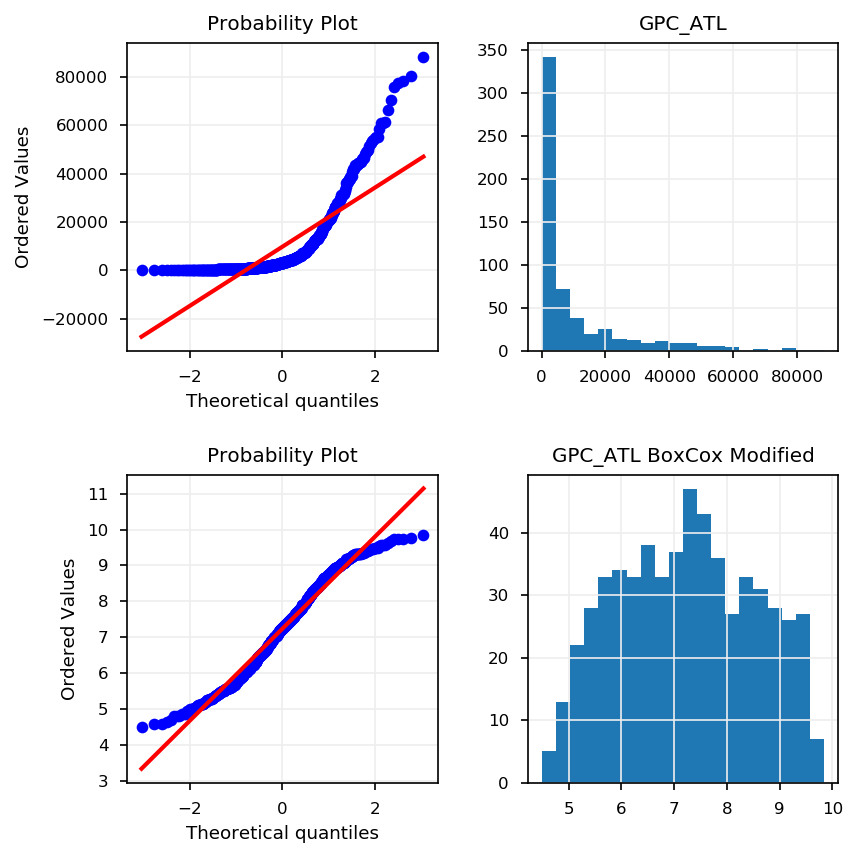

In [312]:
boxcox_vis(clean_data_09['GPC_ATL'], title='GPC_ATL') 

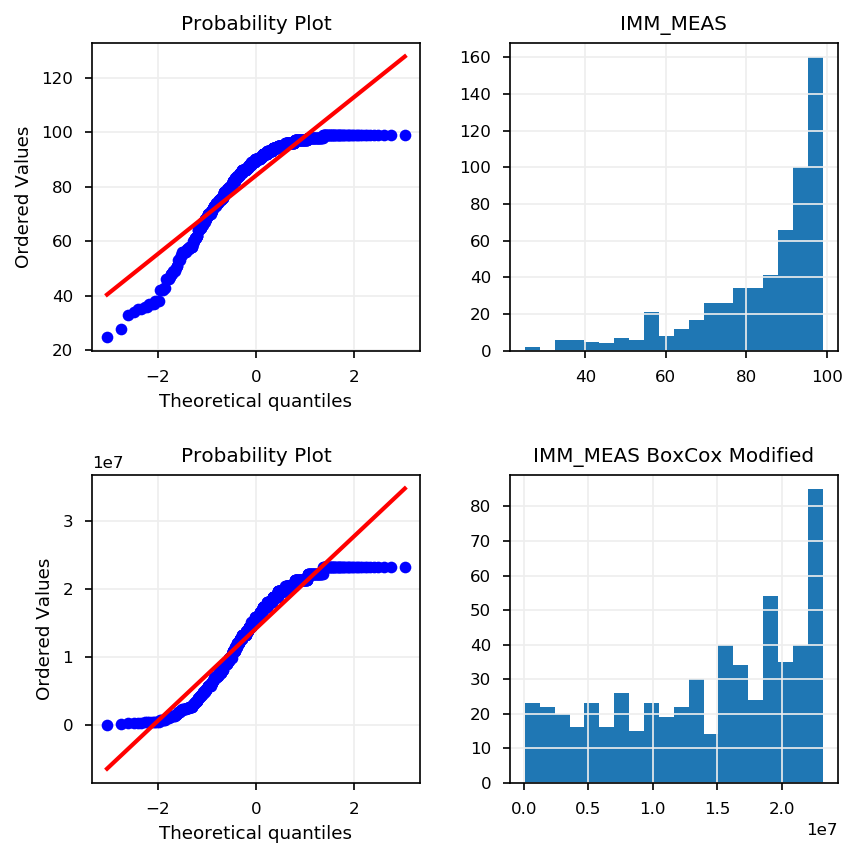

In [313]:
 boxcox_vis(clean_data_09['IMM_MEAS'], title='IMM_MEAS') 

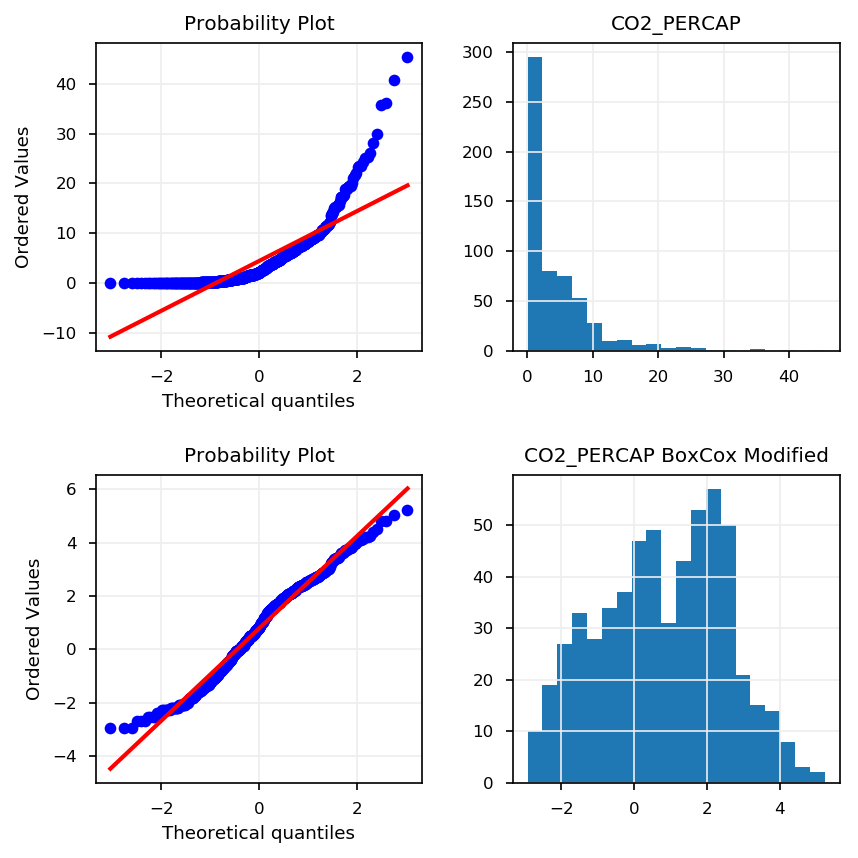

In [317]:
boxcox_vis(clean_data_09['CO2_PERCAP'], title='CO2_PERCAP') 

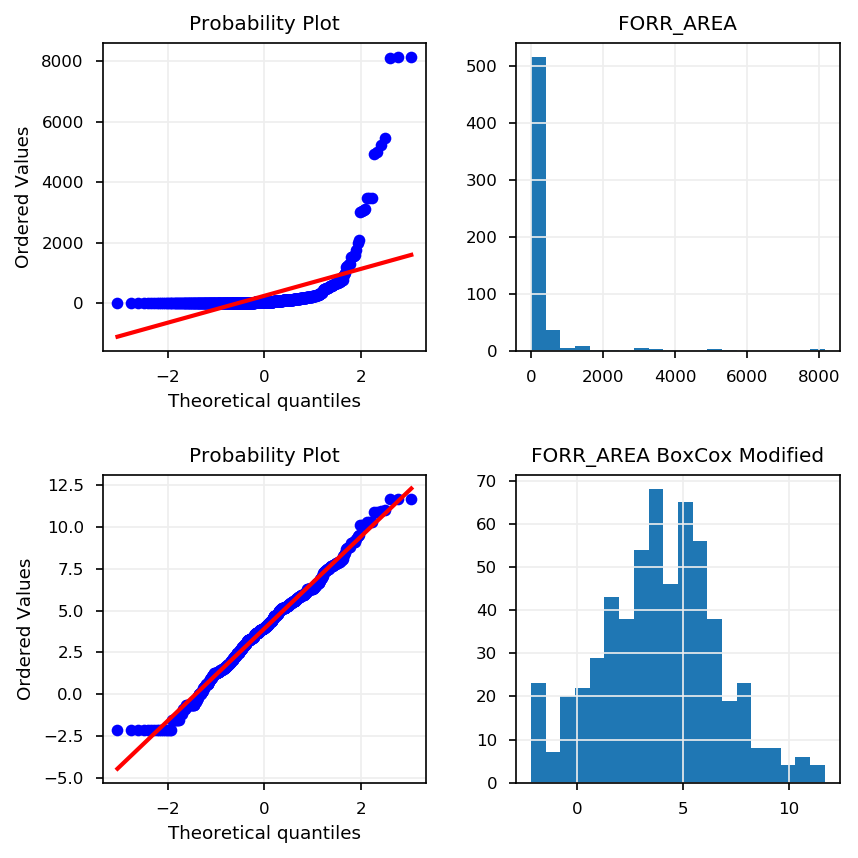

In [320]:
boxcox_vis(clean_data_09['FORR_AREA']+0.1, title='FORR_AREA') 

In [206]:
clean_data_09.columns


Index(['CNT', 'SUB_REGION', 'YR', 'POP_TOT', 'POP_GRO%', 'AREA', 'URB_GRO%',
       'FORR_AREA', 'MORT_RATE', 'POP_DEN', 'GDP', 'CELL_SUB%', 'FER_RATE',
       'CO2_PERCAP', 'GDP_GROW%', 'INF%', 'INTERNET%', 'FOR_INV_NET',
       'IMM_MEAS', 'GNI_ATL', 'GPC_ATL', 'LIF_EXP', 'TEEN_FER_RATE', 'NET_MIG',
       'Australia and New Zealand', 'Central Asia', 'Eastern Asia',
       'Eastern Europe', 'Latin America and the Caribbean', 'Melanesia',
       'Micronesia', 'Northern Africa', 'Northern America', 'Northern Europe',
       'Polynesia', 'South-eastern Asia', 'Southern Asia', 'Southern Europe',
       'Sub-Saharan Africa', 'Western Asia', 'Western Europe', 'log_MORT_RATE',
       'log_POP_DEN', 'log_POP_TOT', 'log_GDP', 'log_CO2_PERCAP',
       'log_GPC_ATL', 'log_FORR_AREA'],
      dtype='object')

In [267]:
clean_data_10 = clean_data_09[['CNT', 'YR', 'SUB_REGION', 'log_MORT_RATE','log_FORR_AREA','log_GPC_ATL', 'log_POP_TOT', 'log_CO2_PERCAP',
                'MORT_RATE', 'POP_GRO%', 'URB_GRO%', 'FER_RATE',  'GDP_GROW%', 'IMM_MEAS', 'LIF_EXP', 'TEEN_FER_RATE', 
                'Australia and New Zealand', 'Central Asia', 'Eastern Asia',
                'Eastern Europe', 'Latin America and the Caribbean', 'Melanesia',
                'Micronesia', 'Northern Africa', 'Northern America', 'Northern Europe',
                'Polynesia', 'South-eastern Asia', 'Southern Asia', 'Southern Europe',
                'Sub-Saharan Africa', 'Western Asia', 'Western Europe' ]]

In [321]:
to_pickle_timestamp(clean_data_10, 'clean_data_10')

saved pickle: ./pickles/clean_data_10_20181010_205648.pkl


In [269]:
mask = (clean_data_10['SUB_REGION'] == 'Sub-Saharan Africa')
north_amer = (clean_data_10['SUB_REGION'] == 'Northern America')
k = clean_data_10[~mask] 

## Moratality Rate for Kids **REALLY** Depends on Location -- Sub-Saharan Africa Mortality is clearly higher than all other countries (orange) $[e^3=20X]$ N. American (green). 

/Users/loaner/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/loaner/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/loaner/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


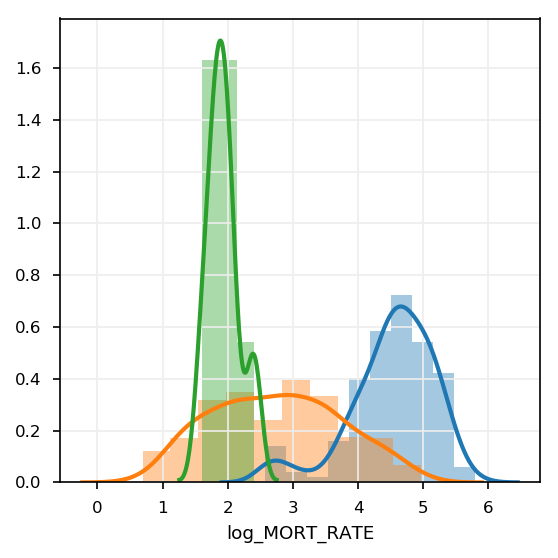

In [288]:
h,w=(4,4)
figure(figsize=(h,w))

sbn.distplot(clean_data_10[mask].log_MORT_RATE, bins=10, label='S.S. Africa')
sbn.distplot(clean_data_10[~mask].log_MORT_RATE, bins=10,  label="Non-S.S. Africa")
sbn.distplot(clean_data_10[north_amer].log_MORT_RATE, bins=3, label="N. America")
             
plt.tight_layout()

In [272]:
#sorting by MORT_RATE shows all the top hits are Sub-Saharan Africa
clean_data_10.sort_values('MORT_RATE', ascending=False)

,CNT,YR,SUB_REGION,log_MORT_RATE,log_FORR_AREA,log_GPC_ATL,log_POP_TOT,log_CO2_PERCAP,MORT_RATE,POP_GRO%,...,Northern Africa,Northern America,Northern Europe,Polynesia,South-eastern Asia,Southern Asia,Southern Europe,Sub-Saharan Africa,Western Asia,Western Europe
522,NER,1990.0,Sub-Saharan Africa,5.789960,2.975530,5.703782,2.080691,-2.407946,327.0,3.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
527,MLI,1990.0,Sub-Saharan Africa,5.537334,4.204693,5.669881,2.136531,-2.995732,254.0,1.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
470,MOZ,1990.0,Sub-Saharan Africa,5.480639,6.072814,5.192957,2.583998,-2.525729,240.0,1.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
525,GIN,1990.0,Sub-Saharan Africa,5.459586,4.286341,6.063785,1.798404,-1.771957,235.0,4.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
528,MWI,1990.0,Sub-Saharan Africa,5.459586,3.666122,5.192957,2.244956,-2.525729,235.0,3.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
425,SLE,2000.0,Sub-Saharan Africa,5.451038,3.377588,4.941642,1.517323,-2.407946,233.0,2.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
530,GNB,1990.0,Sub-Saharan Africa,5.411646,3.104587,5.393628,0.009950,-1.771957,224.0,2.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
241,NER,2000.0,Sub-Saharan Africa,5.411646,2.595255,5.135798,2.429218,-2.813411,224.0,3.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
273,MLI,2000.0,Sub-Saharan Africa,5.393628,4.079231,5.634790,2.395164,-2.659260,220.0,2.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
463,NGA,1990.0,Sub-Saharan Africa,5.356586,5.149817,5.669881,4.556715,-0.891598,212.0,2.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
